In [1]:
cd ~/

/mnt/homes/home024/nwilming


In [2]:
import numpy

In [3]:
%pylab
%load_ext autoreload
%autoreload 2
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib



Bad key "patch.force_edgecolor" on line 33 in
/home/nwilming/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dashed_pattern" on line 18 in
/home/nwilming/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "boxplot.meanprops.markeredgecolor" on line 369 in
/home/nwilming/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad

In [4]:
import mne
import pandas as pd
from conf_analysis.meg import srplots

/home/nwilming/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/nwilming/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
ccs = []
for sub in [1,2,4,5,6,7,8,9,10,11,12,13,14,15]:
    df, meta = srplots.get_power(sub)
    df = df.filter(regex='.*V.*')
    cc = srplots.get_all_correlations(df, meta, n_jobs=12)
    cc.loc[:, 'snum'] = sub

In [24]:
df.filter(regex='.*V.*').columns

Index([u'm-V1d-lh', u'm-V1d-rh', u'm-V1v-lh', u'm-V1v-rh', u'm-V2d-lh',
       u'm-V2d-rh', u'm-V2v-lh', u'm-V2v-rh', u'm-V3A-lh', u'm-V3A-rh',
       u'm-V3B-lh', u'm-V3B-rh', u'm-V3d-lh', u'm-V3d-rh', u'm-V3v-lh',
       u'm-V3v-rh', u'm-VO1-lh', u'm-VO1-rh', u'm-VO2-lh', u'm-VO2-rh',
       u'm-hV4-lh', u'm-hV4-rh', u'max-V1d-lh', u'max-V1d-rh', u'max-V1v-lh',
       u'max-V1v-rh', u'max-V2d-lh', u'max-V2d-rh', u'max-V2v-lh',
       u'max-V2v-rh', u'max-V3A-lh', u'max-V3A-rh', u'max-V3B-lh',
       u'max-V3B-rh', u'max-V3d-lh', u'max-V3d-rh', u'max-V3v-lh',
       u'max-V3v-rh', u'max-VO1-lh', u'max-VO1-rh', u'max-VO2-lh',
       u'max-VO2-rh', u'max-hV4-lh', u'max-hV4-rh', u'mf-V1d-lh', u'mf-V1d-rh',
       u'mf-V1v-lh', u'mf-V1v-rh', u'mf-V2d-lh', u'mf-V2d-rh', u'mf-V2v-lh',
       u'mf-V2v-rh', u'mf-V3A-lh', u'mf-V3A-rh', u'mf-V3B-lh', u'mf-V3B-rh',
       u'mf-V3d-lh', u'mf-V3d-rh', u'mf-V3v-lh', u'mf-V3v-rh', u'mf-VO1-lh',
       u'mf-VO1-rh', u'mf-VO2-lh', u'mf-VO2-rh', u'mf-h

In [17]:
maxcs = cc.groupby(['area', 'sample']).apply(lambda x: abs(x.loc[:, 'corr']).max()).reset_index()
maxcs.columns = ['area', 'sample', 'corr']
maxcs.sort_values('corr')[::-1].head()

,area,sample,corr
1762,pca-V2v-lh,2,0.147155
340,m-V3A-lh,0,0.144410
325,m-V2v-lh,5,0.141888
322,m-V2v-lh,2,0.140257
1780,pca-V3A-lh,0,0.139978


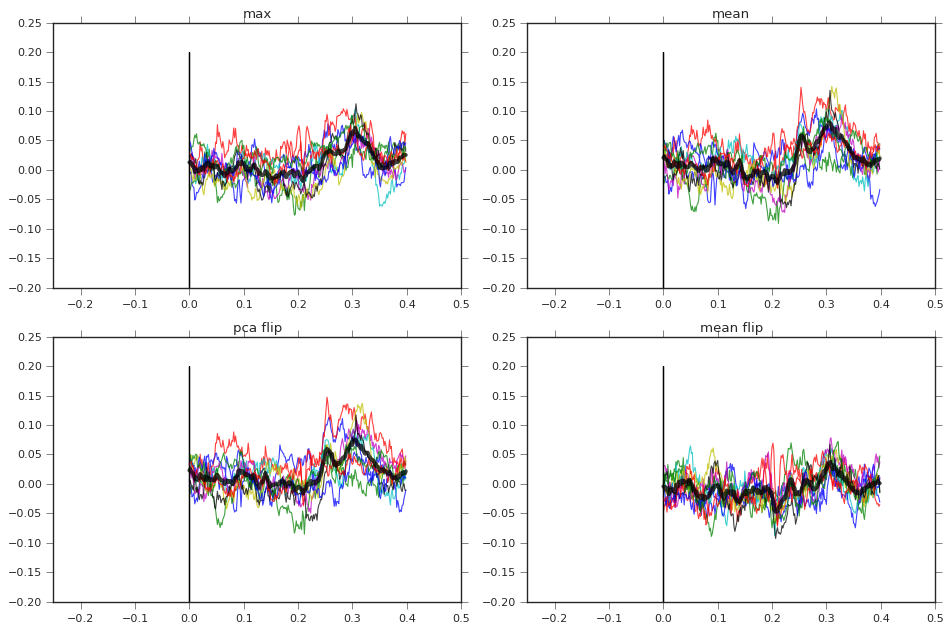

In [14]:
figure(figsize=(12,8))
subplot(2,2,1)
area = 'V2v'
hemi = 'lh'
title('max')

srplots.plot_area(cc.query('area=="max-%s-%s"'%(area, hemi)), alpha=0.75)
subplot(2,2,2)
title('mean')
srplots.plot_area(cc.query('area=="m-%s-%s"'%(area, hemi)), alpha=0.75)
subplot(2,2,3)
title('pca flip')
srplots.plot_area(cc.query('area=="pca-%s-%s"'%(area, hemi)), alpha=0.75)
subplot(2,2,4)
title('mean flip')
srplots.plot_area(cc.query('area=="mf-%s-%s"'%(area, hemi)), alpha=0.75)
tight_layout()

In [15]:
ko = srplots.sample_aligned_power(df, meta, 'pca-V2v-lh')

In [18]:
ko.head()

,contrast,power,sample,time,trial
0,0.436716,-4.659007,0,0.00000,10621
1,0.436716,-2.948785,0,0.00167,10621
2,0.436716,0.573573,0,0.00333,10621
3,0.436716,2.577105,0,0.00500,10621
4,0.436716,5.785182,0,0.00667,10621


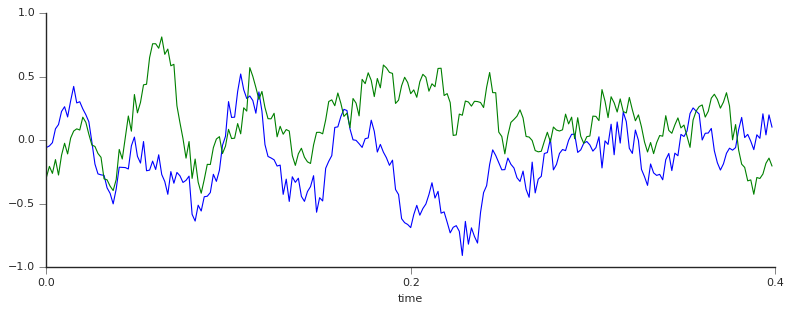

In [19]:
import seaborn as sns
figure(figsize=(10, 4))
grouper = pd.cut(ko.query('sample==2').loc[:, 'contrast'], [0.3, 0.5, .7])
pd.pivot_table(ko.query('sample==2').groupby([grouper, 'time']).mean().loc[:, 'power'].reset_index(),
           values='power', index='contrast', columns='time').T.plot(ax=gca())
legend([])
xticks([0, 0.2, 0.4])
sns.despine()
tight_layout()